In [ ]:
%load_ext rpy2.ipython


In [ ]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.pylab as pylab
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pickle
import itertools
import glob

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [ ]:
import matplotlib.dates as dates
from scipy import stats
from scipy.stats import variation
from scipy.stats import skewnorm
import math
from scipy.signal import butter, filtfilt
import itertools

In [ ]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [ ]:
label_fontsize = 16
title_fontsize = 16

In [ ]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [ ]:
sns.set(font_scale=1.25, style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#%load_ext rpy2.ipython


In [ ]:
%%R
install.packages("tidyverse")
install.packages("lme4")
#install.packages("lmerTestR")
install.packages("afex")
install.packages("ggplot2")
install.packages("sdamr")
install.packages("Matrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmpFf4ZmT/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’

trying URL 'https://cran.rstudio.com/src/contrib/rbibutils_2.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/Rdpack_2.6.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/minqa_1.2.8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/nloptr_2.2.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/reformulas_0.4.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/RcppEigen_0.3.4.0.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/lme4_1.1-37.tar.gz'



In [ ]:
%%R
install.packages("devtools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/devtools_2.4.5.tar.gz'
Content type 'application/x-gzip' length 374718 bytes (365 KB)
downloaded 365 KB


The downloaded source packages are in
	‘/tmp/RtmpFf4ZmT/downloaded_packages’


In [ ]:
%%R
# Alternatively, install just readr:
install.packages("readr")
install.packages("emmeans")
install.packages("BayesFactor", repos='http://cran.us.r-project.org')
install.packages("MuMIn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/RtmpFf4ZmT/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘estimability’, ‘mvtnorm’

trying URL 'https://cran.rstudio.com/src/contrib/estimability_1.5.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/mvtnorm_1.3-3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/emmeans_1.11.2.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpFf4ZmT/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘hypergeo’

trying URL 'http://cran.us.r-project.org/src/contrib/elliptic_1.4-0.t

In [ ]:
%%R
#plot
rm(list = ls())  #remove elements from current workspace
library(lme4)
library(ggplot2)
library(tidyverse)
library(Matrix)
#library(lmerTest)
library(sdamr)
library(afex)
#library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: Matrix
************
Welcome to afex. For support visit: http://afex.singmann.science/
- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- Get and set global package options with: afex_options()
- Set sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************

Attaching package: ‘afex’

The following object is masked from ‘package:lme4’:

    lmer



In [ ]:
%%R
library("plyr")
library("emmeans")
library("reshape2")
library("multcomp")
library("MuMIn")
library("BayesFactor")

Error in library("multcomp") : there is no package called ‘multcomp’


RInterpreterError: Failed to parse and evaluate line 'library("plyr")\nlibrary("emmeans")\nlibrary("reshape2")\nlibrary("multcomp")\nlibrary("MuMIn")\nlibrary("BayesFactor")\n'.
R error message: 'Error in library("multcomp") : there is no package called ‘multcomp’'

In [ ]:
%%R
base_dir='/content/gdrive/MyDrive/Mutual_Information/Colab_Notebooks/conflict_all_RT/'
beh_files = "beh_data/csv_files/"
output_dir = "figures/"
csv_file = paste(base_dir,beh_files,"all_all_RT.csv",sep="")
csv_file


[1] "/content/gdrive/MyDrive/Mutual_Information/Colab_Notebooks/conflict_all_RT/beh_data/csv_files/all_all_RT.csv"


In [ ]:

%%R
RT_data = read_csv(csv_file)
# Definir nombres de las columnas para RT_data
colnames(RT_data) <- c("condition", "RT", "response", "accuracy", "congruency",
                       "ID", "alertness", "RT2", "sleep",
                       "adcond", "prevcong","prevcor", "trlnr")

New names:
• `4` -> `4...1`
• `670` -> `670...2`
• `1` -> `1...4`
• `2` -> `2...5`
• `2` -> `2...6`
• `1` -> `1...7`
• `670` -> `670...8`
• `1` -> `1...9`
• `4` -> `4...10`
• `1` -> `1...11`
• `1` -> `1...12`
Rows: 47373 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): 4...1, 670...2, 8, 1...4, 2...5, 2...6, 1...7, 670...8, 1...9, 4.....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
 RT_data

# A tibble: 47,373 × 13
   condition    RT response accuracy congruency    ID alertness   RT2 sleep
       <dbl> <dbl>    <dbl>    <dbl>      <dbl> <dbl>     <dbl> <dbl> <dbl>
 1         4   630        8        1          2     2         1   630     1
 2         3   470        1        1          1     2         1   470     1
 3         3   690        1        1          1     2         1   690     1
 4         3   680        1        1          1     2         1   680     1
 5         3   560        1        1          1     2         1   560     1
 6         3   570        1        1          1     2         1   570     1
 7         4   580        8        1          2     2         1   580     1
 8         1   690        1        1          2     2         1   690     1
 9         4   690        8        1          2     2         1   690     1
10         2   750        8        1          1     2         1   750     1
# ℹ 47,363 more rows
# ℹ 4 more variables: adcond <dbl>, prevcon

In [ ]:
#%%R
#RT_data <- RT_data[RT_data$adcond != "" & RT_data$adcond != 0, ]
#RT_data <- RT_data[RT_data$prevcor != "" & RT_data$prevcor != 0, ]

In [ ]:
%%R

RT_data$alertness<-factor(RT_data$alertness, levels=c("1","2"), labels=c("alert","drowsy"))
RT_data$congruency<-factor(RT_data$congruency, levels=c("1","2"), labels=c("congruent","incongruent"))
RT_data$prevcong<-factor(RT_data$prevcong, levels=c("1","2"), labels=c("congruent","incongruent"))
RT_data$adcond<-factor(RT_data$adcond, levels=c("1","2","3","4"), labels=c("cC","iC","iI","cI"))
RT_data$sleep<-factor(RT_data$sleep, levels=c("1","2"), labels=c("WR","SD"))
RT_data$ID <- as.factor(RT_data$ID)

In [ ]:
%%R
 RT_data


# A tibble: 47,373 × 13
   condition    RT response accuracy congruency  ID    alertness   RT2 sleep
       <dbl> <dbl>    <dbl>    <dbl> <fct>       <fct> <fct>     <dbl> <fct>
 1         4   630        8        1 incongruent 2     alert       630 WR   
 2         3   470        1        1 congruent   2     alert       470 WR   
 3         3   690        1        1 congruent   2     alert       690 WR   
 4         3   680        1        1 congruent   2     alert       680 WR   
 5         3   560        1        1 congruent   2     alert       560 WR   
 6         3   570        1        1 congruent   2     alert       570 WR   
 7         4   580        8        1 incongruent 2     alert       580 WR   
 8         1   690        1        1 incongruent 2     alert       690 WR   
 9         4   690        8        1 incongruent 2     alert       690 WR   
10         2   750        8        1 congruent   2     alert       750 WR   
# ℹ 47,363 more rows
# ℹ 4 more variables: adcond <f

In [ ]:
%%R
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpFf4ZmT/downloaded_packages’


In [ ]:
%%R
library(dplyr)

# Número de IDs únicos
n_subj <- RT_data %>% summarise(n = n_distinct(ID))
print(n_subj)


   n
1 43


In [ ]:
%%R
# usa dplyr con namespace explícito para evitar choques con plyr
subj_sleep <- RT_data %>%
  dplyr::group_by(ID) %>%
  dplyr::summarise(
    has_WR = any(sleep == "WR", na.rm = TRUE),
    has_SD = any(sleep == "SD", na.rm = TRUE),
    .groups = "drop"
  ) %>%
  dplyr::mutate(
    group = dplyr::case_when(
      has_WR & !has_SD ~ "Only_WR",
      !has_WR & has_SD ~ "Only_SD",
      has_WR &  has_SD ~ "WR_and_SD",
      TRUE              ~ "Other"
    )
  )

# Conteo por grupo (sin count/rename)
counts <- as.data.frame(table(subj_sleep$group))
names(counts) <- c("group", "n_subjects")
counts <- counts[order(-counts$n_subjects), ]
print(counts)

# IDs por grupo (sin pull)
WR_only_IDs <- subset(subj_sleep, group == "Only_WR")[["ID"]]
SD_only_IDs <- subset(subj_sleep, group == "Only_SD")[["ID"]]
WR_SD_IDs   <- subset(subj_sleep, group == "WR_and_SD")[["ID"]]


      group n_subjects
3 WR_and_SD         24
1   Only_SD         10
2   Only_WR          9


In [ ]:
%%R
# Ver los IDs de cada grupo
WR_only_IDs

In [ ]:
%%R
# Ver los IDs de cada grupo
SD_only_IDs

In [ ]:
%%R
# Ver los IDs de cada grupo
WR_SD_IDs


In [ ]:
%%R
# ejemplo: trials alert + WR
n_alert_WR <- RT_data %>% filter(alertness == "alert", sleep == "WR") %>% nrow()

# ejemplo: trials drowsy + SD
n_drowsy_WR <- RT_data %>% filter(alertness == "drowsy", sleep == "WR") %>% nrow()


In [ ]:
%%R
n_alert_WR


[1] 8803


In [ ]:
%%R
n_drowsy_WR


[1] 13992


In [ ]:
%%R
# ejemplo: trials alert + WR
n_alert_SD <- RT_data %>% filter(alertness == "alert", sleep == "SD") %>% nrow()

# ejemplo: trials drowsy + SD
n_drowsy_SD <- RT_data %>% filter(alertness == "drowsy", sleep == "SD") %>% nrow()


In [ ]:
%%R
n_alert_SD

[1] 8736


In [ ]:
%%R
n_drowsy_SD

[1] 15842


In [ ]:
#Model comparison
#define models

In [ ]:
###############################
# anova null vs state
%%R
# null model
null.model <- lmer(RT ~ 1+ (1|ID), data=RT_data, REML=FALSE)
#state model
state.model <- lmer(RT ~ alertness + (1|ID), data=RT_data, REML=FALSE)

anova(null.model, state.model)


Data: RT_data
Models:
null.model: RT ~ 1 + (1 | ID)
state.model: RT ~ alertness + (1 | ID)
            npar    AIC    BIC  logLik deviance Chisq Df Pr(>Chisq)    
null.model     3 691879 691906 -345937   691873                        
state.model    4 681312 681347 -340652   681304 10569  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


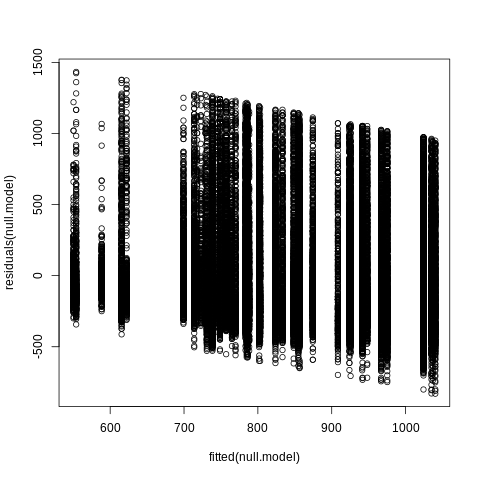

In [ ]:
%%R
plot(fitted(null.model),residuals(null.model))

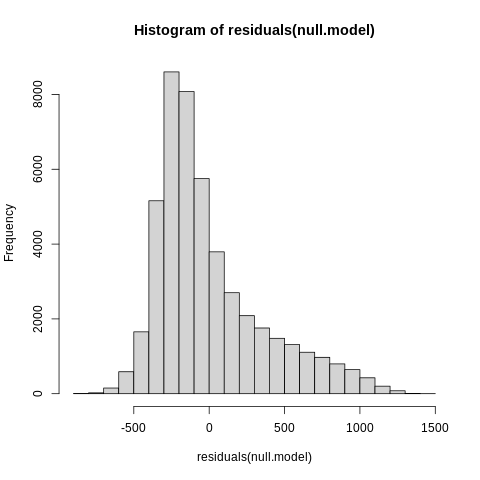

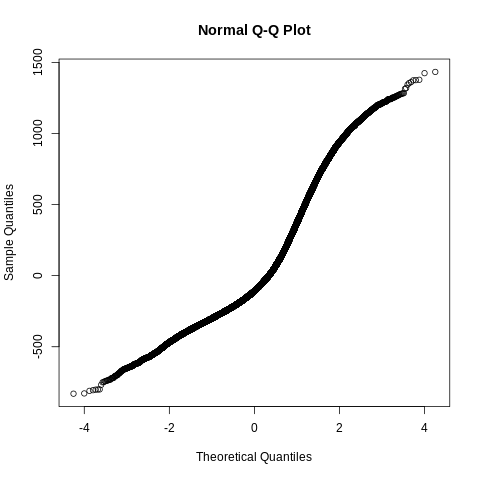

In [ ]:
%%R
hist(residuals(null.model))
qqnorm(residuals(null.model))

In [ ]:
###############################
# anova null vs congruency
%%R
# null model
null.model <- lmer(RT ~ 1+ (1|ID), data=RT_data, REML=FALSE)
#congruency model
congruency.model <- lmer(RT ~ congruency + (1|ID), data=RT_data, REML=FALSE)

anova(null.model, congruency.model)

Data: RT_data
Models:
null.model: RT ~ 1 + (1 | ID)
congruency.model: RT ~ congruency + (1 | ID)
                 npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
null.model          3 691879 691906 -345937   691873                         
congruency.model    4 691786 691821 -345889   691778 95.846  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#######
# anova null vs sleep
%%R
# null model
null.model <- lmer(RT ~ 1+ (1|ID), data=RT_data, REML=FALSE)
# sleep model
sleep.model<- lmer(RT ~ sleep +(1|ID), data=RT_data, REML=FALSE)
anova(null.model,sleep.model)

Data: RT_data
Models:
null.model: RT ~ 1 + (1 | ID)
sleep.model: RT ~ sleep + (1 | ID)
            npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
null.model     3 691879 691906 -345937   691873                         
sleep.model    4 691799 691834 -345895   691791 82.391  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#######
# State:Congruency
%%R
# null model
null.model <- lmer(RT ~ 1+ (1|ID), data=RT_data, REML=FALSE)
state.congruency.model<- lmer(RT ~ alertness * congruency +(1|ID), data=RT_data, REML=FALSE)
anova(null.model,state.congruency.model)


Data: RT_data
Models:
null.model: RT ~ 1 + (1 | ID)
state.congruency.model: RT ~ alertness * congruency + (1 | ID)
                       npar    AIC    BIC  logLik deviance Chisq Df Pr(>Chisq)
null.model                3 691879 691906 -345937   691873                    
state.congruency.model    6 681198 681251 -340593   681186 10687  3  < 2.2e-16
                          
null.model                
state.congruency.model ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#######
# State:Congruency:sleep
%%R
# null model
null.model <- lmer(RT ~ 1+ (1|ID), data=RT_data, REML=FALSE)
state.congruency.sleep.model<- lmer(RT ~ alertness * congruency*sleep +(1|ID), data=RT_data, REML=FALSE)
anova(null.model,state.congruency.sleep.model)

Data: RT_data
Models:
null.model: RT ~ 1 + (1 | ID)
state.congruency.sleep.model: RT ~ alertness * congruency * sleep + (1 | ID)
                             npar    AIC    BIC  logLik deviance Chisq Df
null.model                      3 691879 691906 -345937   691873         
state.congruency.sleep.model   10 680991 681078 -340485   680971 10903  7
                             Pr(>Chisq)    
null.model                                 
state.congruency.sleep.model  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#######
# State:.sleep
%%R
# null model
null.model <- lmer(RT ~ 1+ (1|ID), data=RT_data, REML=FALSE)
state.sleep.model<- lmer(RT ~ alertness*sleep +(1|ID), data=RT_data, REML=FALSE)
anova(null.model,state.sleep.model)

Data: RT_data
Models:
null.model: RT ~ 1 + (1 | ID)
state.sleep.model: RT ~ alertness * sleep + (1 | ID)
                  npar    AIC    BIC  logLik deviance Chisq Df Pr(>Chisq)    
null.model           3 691879 691906 -345937   691873                        
state.sleep.model    6 681102 681155 -340545   681090 10783  3  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#######
# Congruency.sleep
%%R
# null model
null.model <- lmer(RT ~ 1+ (1|ID), data=RT_data, REML=FALSE)
congruency.sleep.model<- lmer(RT ~ congruency*sleep +(1|ID), data=RT_data, REML=FALSE)
anova(null.model,congruency.sleep.model)

Data: RT_data
Models:
null.model: RT ~ 1 + (1 | ID)
congruency.sleep.model: RT ~ congruency * sleep + (1 | ID)
                       npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)
null.model                3 691879 691906 -345937   691873                     
congruency.sleep.model    6 691706 691759 -345847   691694 179.29  3  < 2.2e-16
                          
null.model                
congruency.sleep.model ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#the above analysis show that the state.congruency.sleep.model is the most likely model..
## TABLE 2.
%%R
library(afex)
state.congruency.sleep.model <- mixed(RT ~ alertness * congruency * sleep + (1 |ID), data=RT_data, check_contrasts = FALSE, test_intercept = TRUE, method="S")
state.congruency.sleep.model

Fitting one lmer() model. [DONE]
Calculating p-values. [DONE]
Mixed Model Anova Table (Type 3 tests, S-method)

Model: RT ~ alertness * congruency * sleep + (1 | ID)
Data: RT_data
                      Effect          df            F p.value
1                  alertness 1, 47278.04 11967.97 ***   <.001
2                 congruency 1, 47323.30   111.76 ***   <.001
3                      sleep 1, 47121.48   136.47 ***   <.001
4       alertness:congruency 1, 47323.38         0.03    .855
5            alertness:sleep 1, 47357.84    30.20 ***   <.001
6           congruency:sleep 1, 47323.31         1.00    .318
7 alertness:congruency:sleep 1, 47323.34         0.87    .351
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1


In [ ]:
%%R
summary(state.congruency.sleep.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ alertness * congruency * sleep + (1 | ID)
   Data: data

REML criterion at convergence: 680926.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5220 -0.6666 -0.1547  0.4621  4.5573 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  21273   145.9   
 Residual             101939   319.3   
Number of obs: 47373, groups:  ID, 43

Fixed effects:
                                                Estimate Std. Error         df
(Intercept)                                     562.2297    22.8104    45.9594
alertnessdrowsy                                 379.9984     6.5673 47361.0561
congruencyincongruent                            32.9095     6.8080 47323.2590
sleepSD                                          23.8764     7.2517 47344.6762
alertnessdrowsy:congruencyincongruent             4.5525     8.6903 47323.3423
alertnessdrowsy:sleepSD             

In [ ]:
%%R
print(anova(state.congruency.sleep.model))

Mixed Model Anova Table (Type 3 tests, S-method)

Model: RT ~ alertness * congruency * sleep + (1 | ID)
Data: RT_data
                           num Df den Df          F    Pr(>F)    
alertness                       1  47278 11967.9721 < 2.2e-16 ***
congruency                      1  47323   111.7622 < 2.2e-16 ***
sleep                           1  47121   136.4732 < 2.2e-16 ***
alertness:congruency            1  47323     0.0336    0.8546    
alertness:sleep                 1  47358    30.1991 3.919e-08 ***
congruency:sleep                1  47323     0.9971    0.3180    
alertness:congruency:sleep      1  47323     0.8682    0.3514    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
